In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import sys
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Below are pecialised libraries that deal with text processing.

import re
# gensim is a library for text processing including n-gram models
import gensim
from gensim.utils import simple_preprocess
# spacy is also for text processing, here we are using the lemmatiser
import spacy
# This package draws word clouds, as a form of frequency analysis
import wordcloud

In [ ]:
# Lets extract our sentences and have a look at the data we will be dealing with

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/APPLE_reviews.csv')

In [ ]:
df = df.drop('title', axis = 1)

In [ ]:
df = df.rename(columns={'Reviews': 'review'})

In [ ]:
print('The shape of the dataframe is ', df.shape)
df.head()

The shape of the dataframe is  (4058, 2)


,review,Country
0,I got my new MacBook Pro M1 two weeks ago and ...,UK
1,I bought my Mac from Apple directly not from A...,UK
2,I own over 50 computers and it blows away my 1...,UK
3,It's a Mac once you go Mac you never go back. ...,UK
4,Dead at arrival.... kernel error. Took it to t...,UK


In [ ]:
import re
# Remove punctuation
df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
' ', x))
# df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
# ' ', x)) #Adding another layer of characters to be removed
# Convert the titles to lowercase
df['review'] = df['review'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(df['review'].apply(str).head())

0    i got my new macbook pro m  two weeks ago and ...
1    i bought my mac from apple directly not from a...
2    i own over    computers and it blows away my  ...
3    it s a mac once you go mac you never go back  ...
4    dead at arrival     kernel error  took it to t...
Name: review, dtype: object


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
df['vadar compound'] = df['review'].apply(vadar_sentiment)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'negative'
    return label

# new col with vadar sentiment label based on vadar compound score
df['sentiment'] = df['vadar compound'].apply(categorise_sentiment)

No handles with labels found to put in legend.


positive    2877
negative    1181
Name: sentiment, dtype: int64


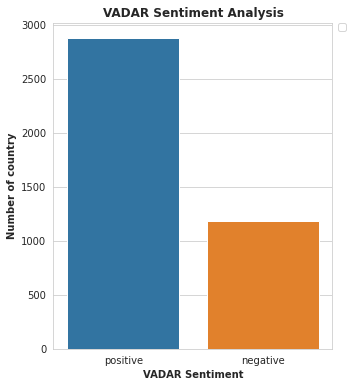

In [ ]:
# plot distribution of article sentiments for each newspaper
print(df['sentiment'].value_counts())
plt.figure(figsize=(5,6))
sns.countplot(x='sentiment', data = df)
plt.title('VADAR Sentiment Analysis', weight='bold')
plt.ylabel('Number of country', fontsize=10, weight='bold')
plt.xlabel('VADAR Sentiment', fontsize=10, weight='bold')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)
plt.show()

In [ ]:
data = df[['review', 'sentiment']]

In [ ]:
data.head()

,review,sentiment
0,i got my new macbook pro m two weeks ago and ...,positive
1,i bought my mac from apple directly not from a...,positive
2,i own over computers and it blows away my ...,positive
3,it s a mac once you go mac you never go back ...,negative
4,dead at arrival kernel error took it to t...,negative


In [ ]:

'''
# this little loops concatenates topics to the review strings...
c = 0
while c <50000:
  data2["review"][c] = "topic_"+str(data2["topics"][c]) + data2["review"][c]
  c=c+1

# little hack, nicer way of doing this I'm sure... 
l = [data2["review"], data1["sentiment"]]
data = pd.DataFrame(l).transpose() 
print(data.describe())
print(data)
'''

x = []
y = []

num_classes = 2

import re

def process_sentence(sentence):
    '''Removes all special characters from sentence. It will also strip out
    extra whitespace and makes the string lowercase.
    '''
    return re.sub(r'[\\\\/:*«`\'?¿";!<>,.|]', '', sentence.lower().strip())



from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# As our sentences in all_sentences.txt are in order, we need to shuffle it first.
sss = StratifiedShuffleSplit(test_size=0.2, random_state=0)

# Clean the sentences
X = data["review"].apply(process_sentence)
y = data["sentiment"]
print('YYYYYYY',y)

# Split all our sentences
elements = (' '.join([sentence for sentence in X])).split()

X_train, X_test, y_train, y_test = None, None, None, None

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    


print(len(X_train), len(X_test))

len(X_train), len(X_test)
labels = set(y)

print("Feature Shapes:")
print("\tTrain set: \t\t{}".format(X_train.shape),
      "\n\tTest set: \t\t{}".format(X_test.shape))
print("Totals:\n\tWords in our Dataset: {}\n\tLabels: {}".format(len(elements), len(labels)))

# Lets look at our training data
print(X_train[:10], y_train[:10])


def create_lookup_tables(text):
    """Create lookup tables for vocabulary
    :param text: The text split into words
    :return: A tuple of dicts (vocab_to_int, int_to_vocab)
    """
    vocab = set(text)
    
    vocab_to_int = {word: i for i, word in enumerate(vocab)}
    int_to_vocab = {v:k for k, v in vocab_to_int.items()}
    
    return vocab_to_int, int_to_vocab


elements.append("<UNK>")

# Map our vocabulary to int
vocab_to_int, int_to_vocab = create_lookup_tables(elements)
labels_to_int, int_to_labels = create_lookup_tables(y)

print("Vocabulary of our dataset: {}".format(len(vocab_to_int)))

def convert_to_int(data, data_int):
    """Converts all our text to integers
    :param data: The text to be converted
    :return: All sentences in ints
    """
    all_items = []
    for sentence in data: 
        all_items.append([data_int[word] if word in data_int else data_int["<UNK>"] for word in sentence.split()])
    
    return all_items

 # Convert our inputs
X_test_encoded = convert_to_int(X_test, vocab_to_int) 
X_train_encoded = convert_to_int(X_train, vocab_to_int)

y_data = convert_to_int(y_test, labels_to_int)  


import sys, os

# this code uses (pre-trained) Word2Vec embeddings... 
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip
path_to_glove_file = "/content/glove.6B.100d.txt"

#path_to_glove_file = os.path.join(
#    os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
#)

import numpy as np

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

num_tokens = len(set(elements)) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in vocab_to_int.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

from tensorflow.keras.layers import Embedding


from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc.fit(y_data)

# One hot encoding our outputs
y_train_encoded = enc.fit_transform(convert_to_int(y_train, labels_to_int)).toarray()
y_test_encoded = enc.fit_transform(convert_to_int(y_test, labels_to_int)).toarray()

# Sample of our encoding
print(y_train_encoded[:10],'\n', y_train[:10])


import tensorflow as tf
# Import Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# Hyperparameters
max_sentence_length = 200
embedding_vector_length = 300
dropout = 0.5

# Truncate and pad input sentences
X_train_pad = sequence.pad_sequences(X_train_encoded, maxlen=max_sentence_length)
X_test_pad = sequence.pad_sequences(X_test_encoded, maxlen=max_sentence_length)

# Create the model
model = Sequential()

import keras
    
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=True,
)

model.add(embedding_layer)
model.add(GRU(256, return_sequences=True, dropout=dropout, recurrent_dropout=dropout))
model.add(GRU(256, dropout=dropout, recurrent_dropout=dropout))
model.add(Dense(len(labels), activation='softmax'))
    
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
print(model.summary())

# Train the model
history = model.fit(X_train_pad, y_train_encoded, batch_size=32, epochs=10, validation_data=(X_test_pad, y_test_encoded))

# Final evaluation of the model
scores = model.evaluate(X_test_pad, y_test_encoded, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


def predict_sentence(sentence):
    """Converts the text and sends it to the model for classification
    :param sentence: The text to predict
    :return: string - The label of the sentence
    """
    
    # Clean the sentence
    sentence = process_sentence(sentence)
    
    # Transform and pad it before using the model to predict
    x = np.array(convert_to_int([sentence], vocab_to_int))
    x = sequence.pad_sequences(x, maxlen=max_sentence_length)
    
    prediction = model.predict(x)
    
    # Get the highest prediction
    lang_index = np.argmax(prediction)
    
    return int_to_labels[lang_index]


YYYYYYY 0       positive
1       positive
2       positive
3       negative
4       negative
          ...   
4053    negative
4054    positive
4055    negative
4056    negative
4057    positive
Name: sentiment, Length: 4058, dtype: object
3246 812
Feature Shapes:
	Train set: 		(3246,) 
	Test set: 		(812,)
Totals:
	Words in our Dataset: 209898
	Labels: 2
1320    love the display and keyboard  purchased other...
2694    the m  macbook air is my favorite portable mac...
2354    it is exactly what i expected from an apple pr...
3937    i just got my new laptop less than a month ago...
2944    the battery life in this laptop exceeds everyt...
470     at a time when so many people are working at h...
3731                                      awesome macbook
3116    the image  sound and speed is great  this was ...
19      i finally  after years of my artist friends an...
2519    i just bought the new macbook pro  have been w...
Name: review, dtype: object 1320    positive
2694    negative
2

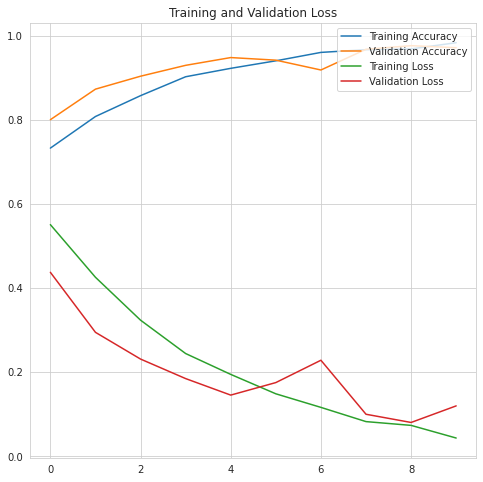

In [ ]:
epochs=10
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 

plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy of embedded and GRU') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 

plt.title('Training and Validation Loss') 
#plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show()